# Infosys 722 iteration 4 -BDAS

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
spark = SparkSession.builder.appName('missing').getOrCreate()
from pyspark.sql.types import DoubleType
from pyspark.sql.types import IntegerType
import pandas as pd

from pyspark.sql import *
spark = SparkSession.builder.appName('logistic_regression_adv').getOrCreate()
from pyspark.ml.classification import LogisticRegression

from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml import Pipeline

import matplotlib.pyplot as plt
import numpy as np

from pyspark.ml.classification import LogisticRegression


In [2]:
df = spark.read.csv('mental-heath-in-tech-2016_20161114.csv', header=True, inferSchema=True)
df.toPandas()

Are you self-employed?  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   
5                         0   
6                         0   
7                         0   
8                         0   
9                         0   
10                        0   
11                        0   
12                        0   
13                        0   
14                        0   
15                        0   
16                        0   
17                        0   
18                        0   
19                        0   
20                        0   
21                        0   
22                        0   
23                        0   
24                        0   
25                        0   
26                        0   
27                        0   
28                        0   
29                        0   
...                     ...   
1427                      0   
1428                      0   
1429                      1   
1430                      1   
1431                      1   
1432                      1   
1433                      0   
1434                      0   
1435                      1   
1436                      1   
1437                      0   
1438                      0   
1439                      0   
1440                      0   
1441                      1   
1442                      0   
1443                      1   
1444                      1   
1445                      1   
1446                      0   
1447                      0   
1448                      1   
1449                      0   
1450                      1   
1451                      0   
1452                      1   
1453                      0   
1454                      1   
1455                      0   
1456                      0   

     How many employees does your company or organization have?  \
0                                               100-500           
1                                              500-1000           
2                                        More than 1000           
3                                                  6-25           
4                                                  6-25           
5                                                   1-5           
6                                                26-100           
7                                               100-500           
8                                        More than 1000           
9                                                   1-5           
10                                             500-1000           
11                                       More than 1000           
12                                               26-100           
13                                                 6-25           
14                                                 6-25           
15                                             500-1000           
16                                                 6-25           
17                                                  1-5           
18                                               26-100           
19                                               26-100           
20                                                 6-25           
21                                                  1-5           
22                                             500-1000           
23                                                  1-5           
24                                                 6-25           
25                                       More than 1000           
26                                               26-100           
27                                              100-500           
28                                              100-500           
29                                               26-100           
...  

In [3]:
df.printSchema()
len(df.columns)

root
 |-- Are you self-employed?: string (nullable = true)
 |-- How many employees does your company or organization have?: string (nullable = true)
 |-- Is your employer primarily a tech company/organization?: string (nullable = true)
 |-- Is your primary role within your company related to tech/IT?: string (nullable = true)
 |-- Does your employer provide mental health benefits as part of healthcare coverage?: string (nullable = true)
 |-- Do you know the options for mental health care available under your employer-provided coverage?: string (nullable = true)
 |-- Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: string (nullable = true)
 |-- Does your employer offer resources to learn more about mental health concerns and options for seeking help?: string (nullable = true)
 |-- Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provid

62

In [4]:
df = df.drop('Why or why not?36', 
             'Why or why not?38', 
             'If yes, what condition(s) have you been diagnosed with?',
             'If , what condition(s) do you believe you have?',
             'If so, what condition(s) were you diagnosed with?')

len(df.columns)

57

In [5]:
df=df.withColumnRenamed("Are you self-employed?", "selfEmp")
df=df.withColumnRenamed("How many employees does your company or organization have?", "numEmployee")
df=df.withColumnRenamed("Is your employer primarily a tech company/organization?", "techCo")
df=df.withColumnRenamed("Does your employer provide mental health benefits as part of healthcare coverage?", "mentalBenefit")
df=df.withColumnRenamed("Does your employer offer resources to learn more about mental health concerns and options for seeking help?", "resourceHelp")
df=df.withColumnRenamed("If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:", "difficultyMedicalLeave")
df=df.withColumnRenamed("Do you think that discussing a mental health disorder with your employer would have negative consequences?", "negConseq")
df=df.withColumnRenamed("Do you feel that your employer takes mental health as seriously as physical health?", "menPhySerious")
df=df.withColumnRenamed("Do you feel that being identified as a person with a mental health issue would hurt your career?", "hurtCareer")
df=df.withColumnRenamed("Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?", "negView")
df=df.withColumnRenamed("How willing would you be to share with friends and family that you have a mental illness?", "shareWillingness")
df=df.withColumnRenamed("Do you have a family history of mental illness?", "famHistory")
df=df.withColumnRenamed("Have you been diagnosed with a mental health condition by a medical professional?", "diagnosed")
df=df.withColumnRenamed("What is your age?", "age")
df=df.withColumnRenamed("What is your gender?", "gender")
df=df.withColumnRenamed("What country do you work in?", "country")

df=df.select("selfEmp","numEmployee", "techCo", "mentalBenefit", 
            "resourceHelp", "difficultyMedicalLeave", "negConseq", "menPhySerious",
            "hurtCareer", "negView", "shareWillingness", "famHistory",
           "diagnosed",  "age", "gender", "country")

df.printSchema()
print("Total data points:", df.count())
len(df.columns)

root
 |-- selfEmp: string (nullable = true)
 |-- numEmployee: string (nullable = true)
 |-- techCo: string (nullable = true)
 |-- mentalBenefit: string (nullable = true)
 |-- resourceHelp: string (nullable = true)
 |-- difficultyMedicalLeave: string (nullable = true)
 |-- negConseq: string (nullable = true)
 |-- menPhySerious: string (nullable = true)
 |-- hurtCareer: string (nullable = true)
 |-- negView: string (nullable = true)
 |-- shareWillingness: string (nullable = true)
 |-- famHistory: string (nullable = true)
 |-- diagnosed: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- country: string (nullable = true)

Total data points: 1457


16

In [6]:
df=df.filter(df["country"]=='United States of America')
df.toPandas()


selfEmp     numEmployee techCo mentalBenefit resourceHelp  \
0         0         100-500      0             0            0   
1         0  More than 1000      0          None            1   
2         0  More than 1000      1             1         None   
3         0             1-5      1             0            0   
4         0        500-1000      1             1            1   
5         0  More than 1000      1             1            0   
6         0          26-100      1             1            1   
7         0            6-25      1             1            0   
8         0            6-25      1             1            0   
9         0          26-100      1             1            0   
10        0          26-100      1             1            1   
11        0             1-5      0          None            0   
12        0        500-1000      1             1         None   
13        0             1-5      1          None            1   
14        0  More than 1000      0             1            1   
15        0          26-100      1             1            1   
16        0         100-500      1             1            0   
17        0          26-100      1             1            1   
18        0  More than 1000      0          None            0   
19        0        500-1000      1             1         None   
20        0         100-500      1             0            0   
21        0  More than 1000      1             1         None   
22        0            6-25      1             0            0   
23        0  More than 1000      0          None         None   
24        0         100-500      0             1         None   
25        0  More than 1000      1             0            0   
26        0             1-5      1             0            0   
27        0  More than 1000      0             1            1   
28        0             1-5      1             0            0   
29        0            6-25      1          None         None   
..      ...             ...    ...           ...          ...   
799       1               0      0          None         None   
800       0  More than 1000      1             1            1   
801       1               0      0          None         None   
802       1               0      0          None         None   
803       0         100-500      1             1            1   
804       1               0      0          None         None   
805       1               0      0          None         None   
806       0         100-500      0             1            1   
807       1               0      0          None         None   
808       0             1-5      1             1            0   
809       0          26-100      1          None         None   
810       1               0      0          None         None   
811       1               0      0          None         None   
812       0         100-500      1             1         None   
813       0  More than 1000      0          None            0   
814       0          26-100      1          None            0   
815       1               0      0          None         None   
816       0             1-5      1             0            0   
817       0         100-500      1             1            0   
818       1               0      0          None         None   
819       0            6-25      1             1         None   
820       1               0      0          None         None   
821       0  More than 1000      0             1            1   
822       1               0      0          None         None   
823       0          26-100      1             1            0   
824       1               0      0          None         None   
825       0         100-500      1             1         None   
826       1               0      0          None         None   
827       0          26-100      1             1            0   
828       0         100-500      0     

In [7]:
print("Total data points:", df.count())
print("Total columns:",len(df.columns))

Total data points: 829
Total columns: 16


Change data type

In [8]:
df.dtypes 

[('selfEmp', 'string'),
 ('numEmployee', 'string'),
 ('techCo', 'string'),
 ('mentalBenefit', 'string'),
 ('resourceHelp', 'string'),
 ('difficultyMedicalLeave', 'string'),
 ('negConseq', 'string'),
 ('menPhySerious', 'string'),
 ('hurtCareer', 'string'),
 ('negView', 'string'),
 ('shareWillingness', 'string'),
 ('famHistory', 'string'),
 ('diagnosed', 'string'),
 ('age', 'int'),
 ('gender', 'string'),
 ('country', 'string')]

In [9]:
df = df.withColumn("selfEmp", df["selfEmp"].cast(DoubleType()))
df = df.withColumn("techCo", df["techCo"].cast(DoubleType()))
df = df.withColumn("mentalBenefit", df["mentalBenefit"].cast(DoubleType()))
df = df.withColumn("resourceHelp", df["resourceHelp"].cast(DoubleType()))
df = df.withColumn("difficultyMedicalLeave", df["difficultyMedicalLeave"].cast(IntegerType()))
df = df.withColumn("negConseq", df["negConseq"].cast(DoubleType()))
df = df.withColumn("menPhySerious", df["menPhySerious"].cast(DoubleType()))
df = df.withColumn("hurtCareer", df["hurtCareer"].cast(DoubleType()))
df = df.withColumn("negView", df["negView"].cast(DoubleType()))
df = df.withColumn("shareWillingness", df["shareWillingness"].cast(IntegerType()))
df = df.withColumn("famHistory", df["famHistory"].cast(DoubleType()))
df = df.withColumn("diagnosed", df["diagnosed"].cast(DoubleType()))

df.dtypes 

[('selfEmp', 'double'),
 ('numEmployee', 'string'),
 ('techCo', 'double'),
 ('mentalBenefit', 'double'),
 ('resourceHelp', 'double'),
 ('difficultyMedicalLeave', 'int'),
 ('negConseq', 'double'),
 ('menPhySerious', 'double'),
 ('hurtCareer', 'double'),
 ('negView', 'double'),
 ('shareWillingness', 'int'),
 ('famHistory', 'double'),
 ('diagnosed', 'double'),
 ('age', 'int'),
 ('gender', 'string'),
 ('country', 'string')]

In [10]:
df.toPandas()

selfEmp     numEmployee  techCo  mentalBenefit  resourceHelp  \
0        0.0         100-500     0.0            0.0           0.0   
1        0.0  More than 1000     0.0            NaN           1.0   
2        0.0  More than 1000     1.0            1.0           NaN   
3        0.0             1-5     1.0            0.0           0.0   
4        0.0        500-1000     1.0            1.0           1.0   
5        0.0  More than 1000     1.0            1.0           0.0   
6        0.0          26-100     1.0            1.0           1.0   
7        0.0            6-25     1.0            1.0           0.0   
8        0.0            6-25     1.0            1.0           0.0   
9        0.0          26-100     1.0            1.0           0.0   
10       0.0          26-100     1.0            1.0           1.0   
11       0.0             1-5     0.0            NaN           0.0   
12       0.0        500-1000     1.0            1.0           NaN   
13       0.0             1-5     1.0            NaN           1.0   
14       0.0  More than 1000     0.0            1.0           1.0   
15       0.0          26-100     1.0            1.0           1.0   
16       0.0         100-500     1.0            1.0           0.0   
17       0.0          26-100     1.0            1.0           1.0   
18       0.0  More than 1000     0.0            NaN           0.0   
19       0.0        500-1000     1.0            1.0           NaN   
20       0.0         100-500     1.0            0.0           0.0   
21       0.0  More than 1000     1.0            1.0           NaN   
22       0.0            6-25     1.0            0.0           0.0   
23       0.0  More than 1000     0.0            NaN           NaN   
24       0.0         100-500     0.0            1.0           NaN   
25       0.0  More than 1000     1.0            0.0           0.0   
26       0.0             1-5     1.0            0.0           0.0   
27       0.0  More than 1000     0.0            1.0           1.0   
28       0.0             1-5     1.0            0.0           0.0   
29       0.0            6-25     1.0            NaN           NaN   
..       ...             ...     ...            ...           ...   
799      1.0               0     0.0            NaN           NaN   
800      0.0  More than 1000     1.0            1.0           1.0   
801      1.0               0     0.0            NaN           NaN   
802      1.0               0     0.0            NaN           NaN   
803      0.0         100-500     1.0            1.0           1.0   
804      1.0               0     0.0            NaN           NaN   
805      1.0               0     0.0            NaN           NaN   
806      0.0         100-500     0.0            1.0           1.0   
807      1.0               0     0.0            NaN           NaN   
808      0.0             1-5     1.0            1.0           0.0   
809      0.0          26-100     1.0            NaN           NaN   
810      1.0               0     0.0            NaN           NaN   
811      1.0               0     0.0            NaN           NaN   
812      0.0         100-500     1.0            1.0           NaN   
813      0.0  More than 1000     0.0            NaN           0.0   
814      0.0          26-100     1.0            NaN           0.0   
815      1.0               0     0.0            NaN           NaN   
816      0.0             1-5     1.0            0.0           0.0   
817      0.0         100-500     1.0            1.0           0.0   
818      1.0               0     0.0            NaN           NaN   
819      0.0            6-25     1.0            1.0           NaN   
820      1.0               0     0.0            NaN           NaN   
821      0.0  More than 1000     0.0            1.0           1.0   
822      1.0               0     0.0            NaN           NaN   
823      0.0          26-100     1.0            1.0           0.0   
824      1.0               0     0.0            NaN           NaN   
825

In [11]:
df.describe().show()

+-------+-------------------+--------------+------------------+------------------+-------------------+----------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------+--------------------+
|summary|            selfEmp|   numEmployee|            techCo|     mentalBenefit|       resourceHelp|difficultyMedicalLeave|         negConseq|      menPhySerious|        hurtCareer|            negView|  shareWillingness|         famHistory|         diagnosed|               age|gender|             country|
+-------+-------------------+--------------+------------------+------------------+-------------------+----------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------+--------------------+
|  count|                829|           829|               829|          

In [12]:
df.describe('SelfEmp').show()
df.describe('numEmployee').show()
df.describe('techCo').show()
df.describe('mentalBenefit').show()
df.describe('resourceHelp').show()
df.describe('difficultyMedicalLeave').show()
df.describe('negConseq').show()
df.describe('menPhySerious').show()
df.describe('hurtCareer').show()
df.describe('negView').show()
df.describe('shareWillingness').show()
df.describe('famHistory').show()
df.describe('diagnosed').show()
df.describe('age').show()
df.describe('gender').show()
df.describe('country').show()

+-------+-------------------+
|summary|            SelfEmp|
+-------+-------------------+
|  count|                829|
|   mean|  0.158021712907117|
| stddev|0.36498156198742726|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+

+-------+--------------+
|summary|   numEmployee|
+-------+--------------+
|  count|           829|
|   mean|           0.0|
| stddev|           0.0|
|    min|             0|
|    max|More than 1000|
+-------+--------------+

+-------+------------------+
|summary|            techCo|
+-------+------------------+
|  count|               829|
|   mean|0.6453558504221955|
| stddev| 0.478694152686845|
|    min|               0.0|
|    max|               1.0|
+-------+------------------+

+-------+------------------+
|summary|     mentalBenefit|
+-------+------------------+
|  count|               482|
|   mean|0.8547717842323651|
| stddev|0.3526968417131039|
|    min|               0.0|
|    max|               1.0|
+-------+

In [13]:
df.select('SelfEmp').distinct().show()
df.select('numEmployee').distinct().show()
df.select('techCo').distinct().show()
df.select('mentalBenefit').distinct().show()
df.select('resourceHelp').distinct().show()
df.select('difficultyMedicalLeave').distinct().show()
df.select('negConseq').distinct().show()
df.select('menPhySerious').distinct().show()
df.select('hurtCareer').distinct().show()
df.select('negView').distinct().show()
df.select('shareWillingness').distinct().show()
df.select('famHistory').distinct().show()
df.select('diagnosed').distinct().show()
df.select('age').distinct().show()
df.select('gender').distinct().show()
df.select('country').distinct().show()

+-------+
|SelfEmp|
+-------+
|    0.0|
|    1.0|
+-------+

+--------------+
|   numEmployee|
+--------------+
|             0|
|       100-500|
|      500-1000|
|More than 1000|
|        26-100|
|           1-5|
|          6-25|
+--------------+

+------+
|techCo|
+------+
|   0.0|
|   1.0|
+------+

+-------------+
|mentalBenefit|
+-------------+
|          0.0|
|         null|
|          1.0|
+-------------+

+------------+
|resourceHelp|
+------------+
|         0.0|
|        null|
|         1.0|
+------------+

+----------------------+
|difficultyMedicalLeave|
+----------------------+
|                  null|
|                     1|
|                     3|
|                     5|
|                     4|
|                     2|
+----------------------+

+---------+
|negConseq|
+---------+
|      0.0|
|     null|
|      1.0|
+---------+

+-------------+
|menPhySerious|
+-------------+
|          0.0|
|         null|
|          1.0|
+-------------+

+----------+
|hurtCareer|
+-

Filter age to include the ages between 16 and 80 only

In [14]:
df=df.filter(df["age"]> 16)
df=df.filter(df["age"]< 80)

In [15]:
df.toPandas()

selfEmp     numEmployee  techCo  mentalBenefit  resourceHelp  \
0        0.0         100-500     0.0            0.0           0.0   
1        0.0  More than 1000     0.0            NaN           1.0   
2        0.0  More than 1000     1.0            1.0           NaN   
3        0.0             1-5     1.0            0.0           0.0   
4        0.0        500-1000     1.0            1.0           1.0   
5        0.0  More than 1000     1.0            1.0           0.0   
6        0.0          26-100     1.0            1.0           1.0   
7        0.0            6-25     1.0            1.0           0.0   
8        0.0            6-25     1.0            1.0           0.0   
9        0.0          26-100     1.0            1.0           0.0   
10       0.0          26-100     1.0            1.0           1.0   
11       0.0             1-5     0.0            NaN           0.0   
12       0.0        500-1000     1.0            1.0           NaN   
13       0.0             1-5     1.0            NaN           1.0   
14       0.0  More than 1000     0.0            1.0           1.0   
15       0.0          26-100     1.0            1.0           1.0   
16       0.0         100-500     1.0            1.0           0.0   
17       0.0          26-100     1.0            1.0           1.0   
18       0.0  More than 1000     0.0            NaN           0.0   
19       0.0        500-1000     1.0            1.0           NaN   
20       0.0         100-500     1.0            0.0           0.0   
21       0.0  More than 1000     1.0            1.0           NaN   
22       0.0            6-25     1.0            0.0           0.0   
23       0.0  More than 1000     0.0            NaN           NaN   
24       0.0         100-500     0.0            1.0           NaN   
25       0.0  More than 1000     1.0            0.0           0.0   
26       0.0             1-5     1.0            0.0           0.0   
27       0.0  More than 1000     0.0            1.0           1.0   
28       0.0             1-5     1.0            0.0           0.0   
29       0.0            6-25     1.0            NaN           NaN   
..       ...             ...     ...            ...           ...   
795      1.0               0     0.0            NaN           NaN   
796      0.0        500-1000     1.0            0.0           0.0   
797      1.0               0     0.0            NaN           NaN   
798      0.0  More than 1000     1.0            1.0           1.0   
799      1.0               0     0.0            NaN           NaN   
800      1.0               0     0.0            NaN           NaN   
801      0.0         100-500     1.0            1.0           1.0   
802      1.0               0     0.0            NaN           NaN   
803      1.0               0     0.0            NaN           NaN   
804      0.0         100-500     0.0            1.0           1.0   
805      1.0               0     0.0            NaN           NaN   
806      0.0          26-100     1.0            NaN           NaN   
807      1.0               0     0.0            NaN           NaN   
808      1.0               0     0.0            NaN           NaN   
809      0.0         100-500     1.0            1.0           NaN   
810      0.0  More than 1000     0.0            NaN           0.0   
811      0.0          26-100     1.0            NaN           0.0   
812      1.0               0     0.0            NaN           NaN   
813      0.0             1-5     1.0            0.0           0.0   
814      0.0         100-500     1.0            1.0           0.0   
815      1.0               0     0.0            NaN           NaN   
816      1.0               0     0.0            NaN           NaN   
817      0.0  More than 1000     0.0            1.0           1.0   
818      1.0               0     0.0            NaN           NaN   
819      0.0          26-100     1.0            1.0           0.0   
820      1.0               0     0.0            NaN           NaN   
821

In [16]:
df.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|               825|
|   mean|34.623030303030305|
| stddev|  8.56824137286031|
|    min|                19|
|    max|                74|
+-------+------------------+



In [17]:
df.describe('gender').show()
df.describe('country').show()
df.select('gender').distinct().show()
df.select('country').distinct().show()


+-------+------+
|summary|gender|
+-------+------+
|  count|   825|
|   mean|  null|
| stddev|  null|
|    min|Female|
|    max| Other|
+-------+------+

+-------+--------------------+
|summary|             country|
+-------+--------------------+
|  count|                 825|
|   mean|                null|
| stddev|                null|
|    min|United States of ...|
|    max|United States of ...|
+-------+--------------------+

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+

+--------------------+
|             country|
+--------------------+
|United States of ...|
+--------------------+



In [18]:
dropped_df = df.na.drop()
dropped_df.show()
print("Total data points:", dropped_df.count())

+-------+--------------+------+-------------+------------+----------------------+---------+-------------+----------+-------+----------------+----------+---------+---+------+--------------------+
|selfEmp|   numEmployee|techCo|mentalBenefit|resourceHelp|difficultyMedicalLeave|negConseq|menPhySerious|hurtCareer|negView|shareWillingness|famHistory|diagnosed|age|gender|             country|
+-------+--------------+------+-------------+------------+----------------------+---------+-------------+----------+-------+----------------+----------+---------+---+------+--------------------+
|    0.0|        26-100|   1.0|          1.0|         1.0|                     3|      0.0|          0.0|       1.0|    1.0|               4|       0.0|      0.0| 34|Female|United States of ...|
|    0.0|More than 1000|   1.0|          0.0|         0.0|                     5|      1.0|          0.0|       1.0|    1.0|               4|       0.0|      0.0| 45|  Male|United States of ...|
|    0.0|        26-100| 

In [19]:
dropped_df = dropped_df.drop('country')
print(dropped_df.columns)
print("Total data points:", dropped_df.count())
print("Total columns:",len(dropped_df.columns))

['selfEmp', 'numEmployee', 'techCo', 'mentalBenefit', 'resourceHelp', 'difficultyMedicalLeave', 'negConseq', 'menPhySerious', 'hurtCareer', 'negView', 'shareWillingness', 'famHistory', 'diagnosed', 'age', 'gender']
Total data points: 54
Total columns: 15


In [20]:
numEmployee_indexer = StringIndexer(inputCol='numEmployee',outputCol='numEmployeeIndex')
gender_indexer = StringIndexer(inputCol='gender',outputCol='genderIndex')
diagnosed_indexer = StringIndexer(inputCol='diagnosed',outputCol='label')

numEmployee_encoder = OneHotEncoder(inputCol='numEmployeeIndex',outputCol='numEmployeeVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')

## H1

Training Dataset Count - h1: 45
Test Dataset Count - h1: 9


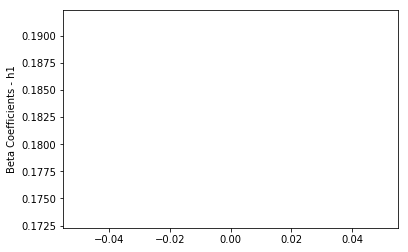

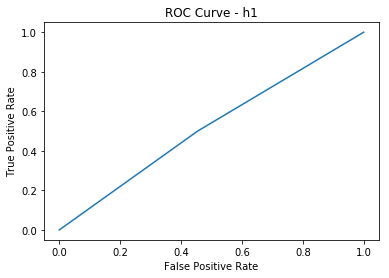

Area Under the Curve - h1: 0.5227272727272727


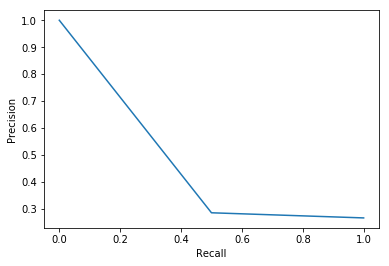

In [21]:
assembler_h1 = VectorAssembler(inputCols=['resourceHelp'], outputCol="features")

pipeline_h1 = Pipeline(stages=[
                    diagnosed_indexer, assembler_h1 ])

pipeline_h1 = pipeline_h1.fit(dropped_df)
pipe_df_h1 = pipeline_h1.transform(dropped_df)
pipe_df_h1 = pipe_df_h1.select('label', 'features')

train_data_h1, test_data_h1 = pipe_df_h1.randomSplit([0.8,0.2])
print("Training Dataset Count - h1: " + str(train_data_h1.count()))
print("Test Dataset Count - h1: " + str(test_data_h1.count()))

lr_model_h1 = LogisticRegression(featuresCol='features',labelCol='label')
lr_model_h1= lr_model_h1.fit(train_data_h1)
results_h1 = lr_model_h1.transform(test_data_h1)

beta_h1 = np.sort(lr_model_h1.coefficients)
plt.plot(beta_h1)
plt.ylabel('Beta Coefficients - h1')
plt.show()

training_h1_summary= lr_model_h1.summary
ROC_h1 = training_h1_summary.roc.toPandas()
plt.plot(ROC_h1['FPR'],ROC_h1['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve - h1')
plt.show()
print('Area Under the Curve - h1: ' + str(training_h1_summary.areaUnderROC))

pr_h1 = training_h1_summary.pr.toPandas()
plt.plot(pr_h1['recall'],pr_h1['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()



## H2

Training Dataset Count - h2: 48
Test Dataset Count - h2: 6


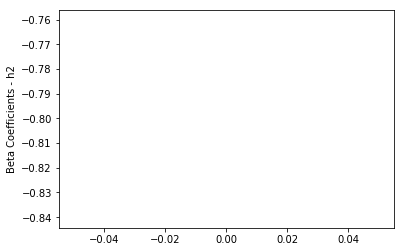

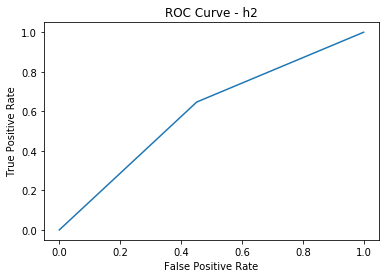

Area Under the Curve - h2: 0.5977229601518026


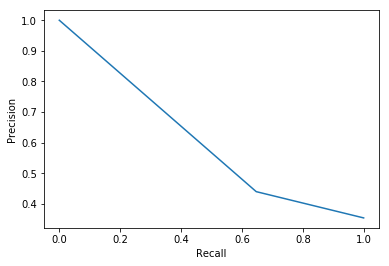

In [22]:
assembler_h2 = VectorAssembler(inputCols=['negConseq'], outputCol="features")

pipeline_h2 = Pipeline(stages=[
                    diagnosed_indexer, assembler_h2 ])
pipeline_h2 = pipeline_h2.fit(dropped_df)
pipe_df_h2 = pipeline_h2.transform(dropped_df)
pipe_df_h2 = pipe_df_h2.select('label', 'features')

train_data_h2, test_data_h2 = pipe_df_h2.randomSplit([0.8,0.2])
print("Training Dataset Count - h2: " + str(train_data_h2.count()))
print("Test Dataset Count - h2: " + str(test_data_h2.count()))

lr_model_h2 = LogisticRegression(featuresCol='features',labelCol='label')
lr_model_h2= lr_model_h2.fit(train_data_h2)
results_h2 = lr_model_h2.transform(test_data_h2)

beta_h2 = np.sort(lr_model_h2.coefficients)
plt.plot(beta_h2)
plt.ylabel('Beta Coefficients - h2')
plt.show()

training_h2_summary= lr_model_h2.summary
ROC_h2 = training_h2_summary.roc.toPandas()
plt.plot(ROC_h2['FPR'],ROC_h2['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve - h2')
plt.show()
print('Area Under the Curve - h2: ' + str(training_h2_summary.areaUnderROC))

pr_h2 = training_h2_summary.pr.toPandas()
plt.plot(pr_h2['recall'],pr_h2['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


## H3

Training Dataset Count - h3: 46
Test Dataset Count - h3: 8


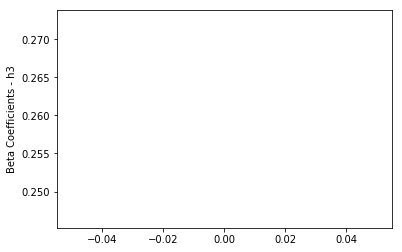

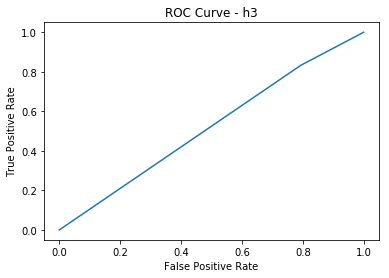

Area Under the Curve - h3: 0.5196078431372549


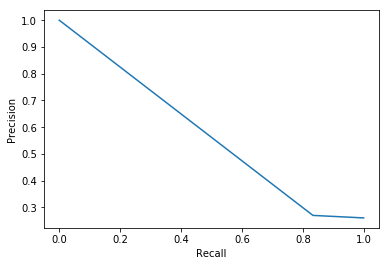

In [23]:
assembler_h3 = VectorAssembler(inputCols=['techCo'], outputCol="features")

pipeline_h3 = Pipeline(stages=[
                    diagnosed_indexer, assembler_h3 ])

pipeline_h3 = pipeline_h3.fit(dropped_df)
pipe_df_h3 = pipeline_h3.transform(dropped_df)
pipe_df_h3 = pipe_df_h3.select('label', 'features')

train_data_h3, test_data_h3 = pipe_df_h3.randomSplit([0.8,0.2])
print("Training Dataset Count - h3: " + str(train_data_h3.count()))
print("Test Dataset Count - h3: " + str(test_data_h3.count()))

lr_model_h3 = LogisticRegression(featuresCol='features',labelCol='label')
lr_model_h3= lr_model_h3.fit(train_data_h3)
results_h3 = lr_model_h3.transform(test_data_h3)

beta_h3 = np.sort(lr_model_h3.coefficients)
plt.plot(beta_h3)
plt.ylabel('Beta Coefficients - h3')
plt.show()

training_h3_summary= lr_model_h3.summary
ROC_h3 = training_h3_summary.roc.toPandas()
plt.plot(ROC_h3['FPR'],ROC_h3['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve - h3')
plt.show()
print('Area Under the Curve - h3: ' + str(training_h3_summary.areaUnderROC))

pr_h3 = training_h3_summary.pr.toPandas()
plt.plot(pr_h3['recall'],pr_h3['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


## first iteration

Training Dataset Count: 41
Test Dataset Count: 13


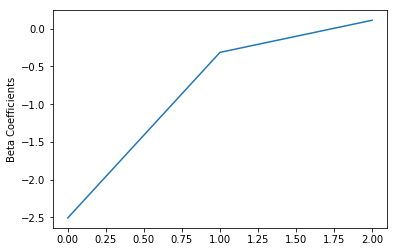

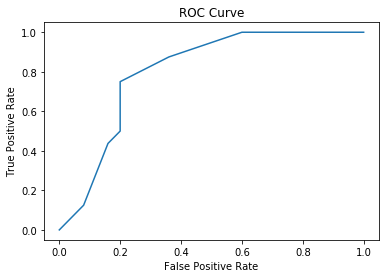

Area Under the Curve: 0.8012499999999999


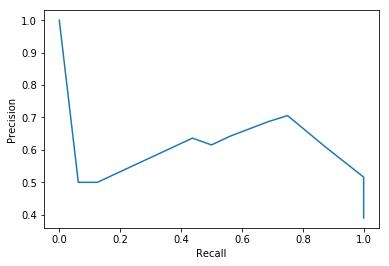

In [24]:
assembler = VectorAssembler(inputCols=[ 
                                       'shareWillingness', 'famHistory', 'genderVec'], outputCol="features")

pipeline = Pipeline(stages=[
                    diagnosed_indexer,
                    gender_indexer,
                    gender_encoder,
                    assembler])
pipeline_model = pipeline.fit(dropped_df)
pipe_df = pipeline_model.transform(dropped_df)
pipe_df = pipe_df.select('label', 'features')

train_data, test_data = pipe_df.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

beta = np.sort(lr_model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

training_summary = lr_model.summary
ROC = training_summary.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

pr = training_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


## Second iteration

Training Dataset Count: 42
Test Dataset Count: 12


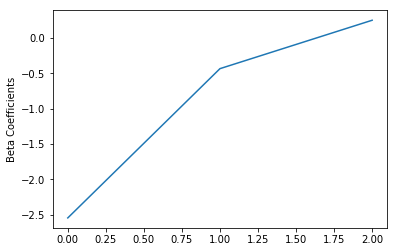

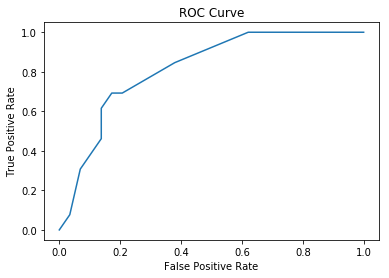

Area Under the Curve: 0.8156498673740052


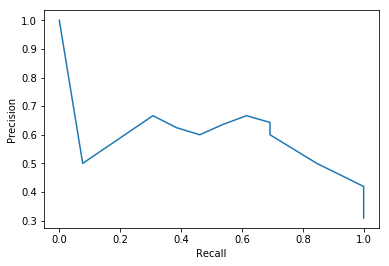

In [25]:
assembler = VectorAssembler(inputCols=[ 
                                       'shareWillingness', 'famHistory', 'genderVec'], outputCol="features")

pipeline = Pipeline(stages=[
                    diagnosed_indexer,
                    gender_indexer,
                    gender_encoder,
                    assembler])
pipeline_model = pipeline.fit(dropped_df)
pipe_df = pipeline_model.transform(dropped_df)
pipe_df = pipe_df.select('label', 'features')

train_data, test_data = pipe_df.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

beta = np.sort(lr_model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

training_summary = lr_model.summary
ROC = training_summary.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

pr = training_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## Third iteration

Training Dataset Count: 50
Test Dataset Count: 4


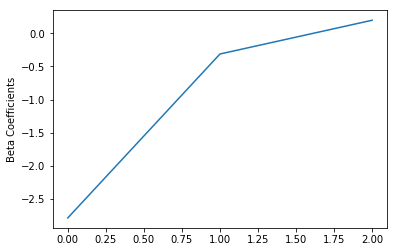

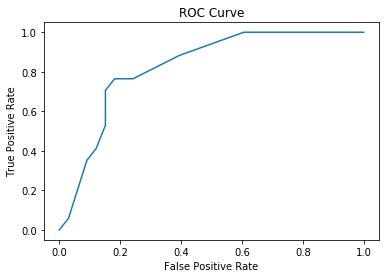

Area Under the Curve: 0.8262032085561497


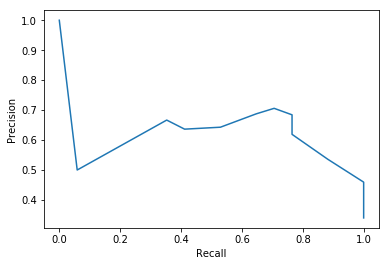

In [26]:
assembler = VectorAssembler(inputCols=[ 
                                       'shareWillingness', 'famHistory', 'genderVec'], outputCol="features")

pipeline = Pipeline(stages=[
                    diagnosed_indexer,
                    gender_indexer,
                    gender_encoder,
                    assembler])
pipeline_model = pipeline.fit(dropped_df)
pipe_df = pipeline_model.transform(dropped_df)
pipe_df = pipe_df.select('label', 'features')

train_data, test_data = pipe_df.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

beta = np.sort(lr_model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

training_summary = lr_model.summary
ROC = training_summary.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

pr = training_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()